# Imports

##### Here I will be importing the necessary packages to use for this project. Some may not be used but could be used and I am covering my baises with them incase I do use one later on.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import scipy.stats as stats
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

# Understanding the columns
#### Before I even read in the csv the best thing to do is to give an overview of thecolumns with an explenation of them.
player_name = Name of the player

rounds = Number of rounds completed

fairway_percentage = This statistic refers to the number of times during the round your drive landed in the fairway (the fairway, not the light rough). It is similar to the greens in regulation, except that the maximum number per round is less than 18.

year = Year of competition.

avg_distance = The average driving distance is typically measured on two holes at each tournament and can result in nearly 40,000 shots being measured over the course of a season on some tours.

gir = Green in regulation (GIR) A green is considered hit "in regulation" if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par (i.e., by the first stroke on a par 3, the second stroke on a par 4, or the third stroke on a par 5).

average_putts = Average Putts is the average of putts by a player per round in the given year.

average_scrambling = Average Scrambling in golf is defined as: The percent of time a player misses the green in regulation, but still makes par or better on average based off their rounds.

average_score = Average Score is the average of all rounds played and scored by a player in a given year.

points = FedExCup Points are awarded by finish position as defined in the point distribution tables. Limited field events during the FedExCup competition will not redistribute the points for places that do not play.

wins = The amount of times a player as won in that given year.

top_10 = Top 10 is the amount of times a player placed in the top 10 in an event of a given year.

average_sg_putts = Strokes Gained Putting reflects your performance on all putts. It compares the actual number of putts taken to the expected number of strokes to hole out based on the initial distance to the pin.

average_sg_total = Strokes gained: total simply compares a player's score to the field average. For example, a player will gain three strokes on the field if he shoots 69 on a day when the field averages 72.

sg:ott Strokes Gained: Off the Tee does just what it says, tracking a player’s performance off the Tee. This stat only applies to Par 4s and 5s, which is something to keep in mind since a solid driver of the ball can still struggle with Par 3s even if their performance is off the charts in this category.

sg:apr = Strokes Gained Approach reflects your performance on shots taken from more than 50 yards from the green, including layup shots. It takes into account the lie you were hitting from, as well as distance and accuracy.

sg:arg = Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.

# Reading in the Data and doing EDA and cleaning

###### In the first portion I will call .info() in order to check on the data given and how it is classified in the dataframe. 
###### Furthermore, I will be replacing Nan to 0 in cloumns that it is needed anf then drop the null value from the remaining.
###### The following columns: Rounds, Points, Money, Player Name all had changes applied to them.
###### The column names where also made to be lowercase as well as removing spaces and replacing them with "_".
###### I then just do some exploring of the data from beople that have won to the people that have made top_10 as well as checking on the describe function for a couple columns.

In [2]:
df = pd.read_csv('../../../data/pgaTourData.csv')
df.head(10)

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
5,Brian Gay,103.0,71.37,2018,282.9,64.52,28.25,63.26,70.280,880,NaN,6.0,0.442,0.565,-0.166,0.036,0.253,"$2,152,501"
6,Kyle Stanley,93.0,71.29,2018,295.7,71.09,29.89,54.80,70.404,"1,198",NaN,5.0,0.037,0.686,0.378,0.298,-0.027,"$3,916,001"
7,Emiliano Grillo,94.0,70.16,2018,295.2,68.84,29.04,61.05,70.152,901,NaN,5.0,0.546,1.133,0.364,0.345,-0.122,"$2,493,163"
8,Russell Henley,77.0,70.03,2018,293.0,68.77,29.80,54.33,70.489,569,NaN,3.0,0.167,0.541,0.093,0.467,-0.186,"$1,516,438"
9,Jim Furyk,50.0,69.91,2018,280.5,63.19,28.73,62.58,70.342,291,NaN,2.0,0.389,0.412,-0.392,0.179,0.235,"$660,010"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [4]:
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)
df.dropna(axis = 0, inplace=True)
df['Rounds'] = df['Rounds'].astype(int)
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)
df.columns = map(str.lower, df.columns)
df["money"] = df["money"].str.replace("$", "")
df["money"] = df["money"].str.replace(",", "")
df["money"] = df["money"].str.replace(".", "")
df["money"] = df["money"].astype('float64')
df.columns=df.columns.str.replace(' ', '_')
df["player_name"] = df["player_name"].str.replace(' ', '_')
df.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez_Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan_Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian_Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [5]:
players_that_won = df.loc[df['wins'] >= 1, :]
players_that_won.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
16,Billy_Horschel,86,67.80,2018,295.4,71.75,29.46,58.03,70.154,960,1,3,0.392,1.112,0.538,0.352,-0.169,4315200.0
22,"Ted_Potter,_Jr.",87,66.83,2018,286.0,63.03,28.45,57.51,71.024,744,1,1,0.074,-0.094,-0.074,-0.200,0.105,1976198.0
23,Austin_Cook,107,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060,1,3,0.315,0.569,0.120,-0.045,0.179,2448920.0
27,Ian_Poulter,73,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030,1,4,0.223,0.850,0.141,0.435,0.051,2714450.0


In [6]:
players_that_have_top10 = df.loc[df['top_10'] >= 1, :]
players_that_have_top10.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez_Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan_Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian_Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [7]:
players_that_have_sub_par = df.loc[df['average_score'] <= 70, :]
players_that_have_sub_par.head()

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
15,Rafa_Cabrera_Bello,75,67.85,2018,295.1,70.16,29.47,57.98,69.887,784,0,4,0.273,1.112,0.256,0.487,0.096,2449869.0
32,Justin_Rose,70,66.02,2018,303.5,69.95,28.67,63.03,68.993,1991,2,8,0.424,1.952,0.551,0.526,0.450,8130678.0
39,Rickie_Fowler,74,65.33,2018,299.8,69.52,28.99,63.05,69.435,1302,0,4,0.296,1.275,0.244,0.494,0.242,4235237.0
46,Francesco_Molinari,73,65.04,2018,301.0,70.24,29.63,58.67,69.797,1682,2,4,-0.487,1.123,0.690,0.593,0.327,5065842.0


In [8]:
df['money'].describe()

count    1.674000e+03
mean     1.488682e+06
std      1.410333e+06
min      2.465000e+04
25%      5.656412e+05
50%      1.046144e+06
75%      1.892478e+06
max      1.203046e+07
Name: money, dtype: float64

In [9]:
df['fairway_percentage'].describe()

count    1674.000000
mean       61.448614
std         5.057758
min        43.020000
25%        57.955000
50%        61.435000
75%        64.910000
max        76.880000
Name: fairway_percentage, dtype: float64

In [10]:
df['avg_distance'].describe()

count    1674.000000
mean      290.786081
std         8.908379
min       266.400000
25%       284.900000
50%       290.500000
75%       296.375000
max       319.700000
Name: avg_distance, dtype: float64

###### Below I am taking the data from the the .descibe() method to come to the conclussion that it is best to use the meadian as we are looking at more middle of the pack players so while the 75th percentile is only roughly 400,000 dollars more that is about a half a standard deviation so we said the significance was not enough for our group to change to the 75th percentile.

In [11]:
fift_percent = df['money'].describe()[5]
df['money']=df['money'].apply(lambda x: 1 if x> fift_percent else 0)
df['money'].value_counts()

1    837
0    837
Name: money, dtype: int64

# Feature engeneering
###### I then go in and make two new columns combining columns. I chose to combine ave_distance and fairway_percentage because we wanted to get the difference between the two as a person that has played golf for years it is just as important to hit the fairway as it is to hit the ball far so we wanted a column that would give us this so we created distance_fairway. We when created another one that is winners which is just giving us the people thathave either won or have not and giving them a 1 or a 0.
###### Then I check for any null values in the data

In [12]:
df['distance_fairway'] = df['avg_distance'] / df['fairway_percentage']

In [13]:
df['winners']=df['wins'].apply(lambda x: 1 if x>0 else 0)
df.head(488)

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_fairway,winners
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,1,3.876845,0
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,1,3.852949,1
2,Chez_Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,1,3.965947,0
3,Ryan_Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1,4.020017,0
4,Brian_Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1,3.903975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Sung_Kang,89,59.36,2016,292.4,65.26,29.06,59.74,70.856,473,0,2,0.186,0.004,-0.009,-0.121,-0.053,0,4.925876,0
485,Willy_Wilcox,67,59.34,2016,292.9,63.42,28.74,58.18,71.055,399,0,2,-0.027,-0.089,0.040,0.159,-0.261,0,4.935962,0
486,J.J._Henry,68,59.33,2016,287.3,67.51,30.45,53.11,72.019,162,0,0,-0.237,-0.711,-0.144,-0.226,-0.104,0,4.842407,0
487,Harold_Varner_III,92,59.33,2016,302.0,66.24,29.73,56.53,71.045,643,0,4,-0.377,0.101,0.529,0.021,-0.072,1,5.090174,0


In [14]:
df.isna().sum()

player_name           0
rounds                0
fairway_percentage    0
year                  0
avg_distance          0
gir                   0
average_putts         0
average_scrambling    0
average_score         0
points                0
wins                  0
top_10                0
average_sg_putts      0
average_sg_total      0
sg:ott                0
sg:apr                0
sg:arg                0
money                 0
distance_fairway      0
winners               0
dtype: int64

#  Model Function
###### I created a funtion that runs the model you create and runs diffrent test on the predicted values.

In [15]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print scores
    print('Training accuracy score: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy score: ', accuracy_score(y_val, val_preds))
    print('Training Precision score: ', precision_score(y_train, train_preds))
    print('Validation Precision score: ', precision_score(y_val, val_preds))
    print('Training recall score: ', recall_score(y_train, train_preds))
    print('Validation recall score: ', recall_score(y_val, val_preds))
    # return fitted model
    return model

# Preparation for model function
###### In this we will address our features and target variable, create Train-Test Splits,  Instantiate a SimpleImputer, Instantiate StandardScaler. 

In [16]:
# Target
y = df['money']
# Features
X = df.drop(df[['money','player_name','wins','avg_distance','fairway_percentage','year']], axis=1)

In [17]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.35, random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.35, random_state=42,shuffle=True)

In [18]:
# Instantiate a SimpleImputer
imputer = SimpleImputer(strategy='median')
# Fit on training data
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [19]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X.columns)
print("X_train missing: ", X_train_imputed.isna().sum().sum())
print('X_val missing: ', X_val_imputed.isna().sum().sum())

X_train missing:  0
X_val missing:  0


In [20]:
num_cols = list(X.select_dtypes('number').columns)

In [21]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [22]:
# fit on Imputed training data
scaler.fit(X_train_imputed[num_cols])

StandardScaler()

In [23]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed[num_cols]), columns=num_cols)

# Instantiate Models
###### Below we will create multiple models in order to find the best model for our data based of the scores given to us through the modeling function.  As well as call a confusion matrix in order to see the True Positives, True Negatives, False Positives, and False Negatives.

# Baseline model

In [24]:
# Instantiate LogisticRegression
logreg2 = LogisticRegression()

In [25]:
logreg2.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
# call modeling function
logreg2 = modeling_function(logreg2, X_train_scaled, y_train, X_val_scaled , y_val)

Training accuracy score:  0.9193776520509194
Validation accuracy score:  0.9396325459317585
Training Precision score:  0.9226361031518625
Validation Precision score:  0.9402173913043478
Training recall score:  0.9147727272727273
Validation recall score:  0.9351351351351351


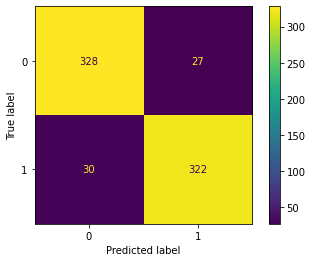

In [27]:
plot_confusion_matrix(logreg2, X_train_scaled, y_train)

# Second model
###### This is a simple decision tree with a random state of 42 and a max_depth set at 10

In [28]:
dt2 = DecisionTreeClassifier(random_state=42, max_depth=10)

In [29]:
dt2 = modeling_function(dt2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  1.0
Validation accuracy score:  0.9002624671916011
Training Precision score:  1.0
Validation Precision score:  0.8808290155440415
Training recall score:  1.0
Validation recall score:  0.918918918918919


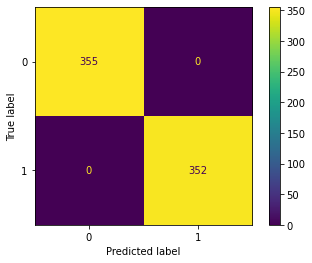

In [30]:
plot_confusion_matrix(dt2, X_train_scaled, y_train)

### The tests that ran there obviously very high and no where as good at the baseling model


# Third Model 
###### This is a Random forest Classifier with a random state of 42 

In [31]:
rf = RandomForestClassifier(random_state=42 )

In [32]:

rf = modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  1.0
Validation accuracy score:  0.9501312335958005
Training Precision score:  1.0
Validation Precision score:  0.9510869565217391
Training recall score:  1.0
Validation recall score:  0.9459459459459459


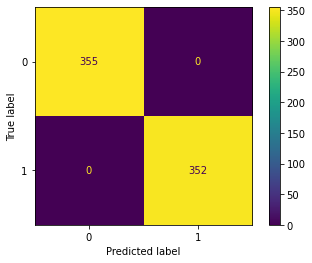

In [33]:
plot_confusion_matrix(rf, X_train_scaled, y_train)

## This was slightly better than the second model but still not good so we continue.

# Forth model
###### This model is a GridsearchCv on the random forest Model made above, with the paramaters n_estimators ,max_depth, min_samples_leaf with the scoring being accuracy.

In [34]:
# Create Param Grid 
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [35]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [36]:
rf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [37]:
good_model = rf_gs.best_estimator_

In [38]:
rf_gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 75}

In [39]:
modeling_function(good_model, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  0.9504950495049505
Validation accuracy score:  0.9501312335958005
Training Precision score:  0.9515669515669516
Validation Precision score:  0.9510869565217391
Training recall score:  0.9488636363636364
Validation recall score:  0.9459459459459459


RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

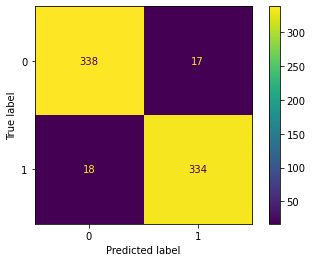

In [40]:
plot_confusion_matrix(good_model, X_train_scaled, y_train)

#### We are getting on the right track with this as this is the best model we have gotten so far, but we continue and try a diffrent model now.

# Fifth Model
###### This model is and XGBoost Classifier with a Gridsearch added to is with the parameters, gamma, subsample, colsample_bytree, and max_depth.

In [41]:
xgb = XGBClassifier(random_state=42)

In [42]:
xgb = modeling_function(xgb, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  1.0
Validation accuracy score:  0.9291338582677166
Training Precision score:  1.0
Validation Precision score:  0.9157894736842105
Training recall score:  1.0
Validation recall score:  0.9405405405405406


In [43]:
param_grid = {'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [44]:
xgb_gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy')

In [45]:
xgb_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                           

In [46]:
best_model = xgb_gs.best_estimator_

In [47]:
xgb_gs.best_params_

{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'subsample': 1.0}

In [48]:
modeling_function(best_model, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy score:  0.9519094766619519
Validation accuracy score:  0.9448818897637795
Training Precision score:  0.9542857142857143
Validation Precision score:  0.9361702127659575
Training recall score:  0.9488636363636364
Validation recall score:  0.9513513513513514


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

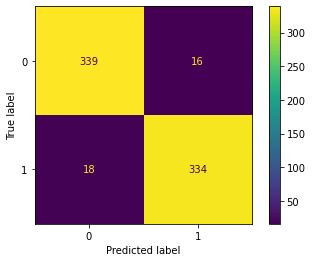

In [49]:
plot_confusion_matrix(best_model, X_train_scaled, y_train)

# With our final model completed with test scores of : 
###### Training accuracy score:  0.951 ,Validation accuracy score:  0.944
###### Training Precision score:  0.952 , Validation Precision score:  0.936
###### Training recall score:  0.948 , Validation recall score:  0.951


### This was to be my final model for money so the next thing needed to do is to pass the X_test data through it to get the scores.

##### But before we pass it into the best model we need to do all the work we did for the X_train and X_val data.

In [50]:
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

In [51]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed[num_cols]), columns=num_cols)

In [52]:
test_preds = best_model.predict(X_test_scaled)

In [53]:
    print('Test accuracy score: ', accuracy_score(y_test, test_preds))
    print('Test Precision score: ', precision_score(y_test, test_preds))
    print('Test recall score: ', recall_score(y_test, test_preds))  

Test accuracy score:  0.9129692832764505
Test Precision score:  0.9278350515463918
Test recall score:  0.9


# Final functions 
#### These functions will be used so I can join my teammates models to mine is our efforts to sponser an upand coming golfer.

In [54]:
def Name_id(name, year):
    row=df.loc[(df['player_name']==name) & (df['year']==year)]
    return row

In [55]:
def select_features(name, year):
    name_id = Name_id(name, year)
    dropped=name_id.drop(['money','player_name','wins','avg_distance','fairway_percentage','year'], axis=1)
    target= name_id['money']
    pred = best_model.predict(dropped)[0]
    return pred

In [56]:
select_features(name="Justin_Thomas", year = 2017)

1

# Creating visualizations

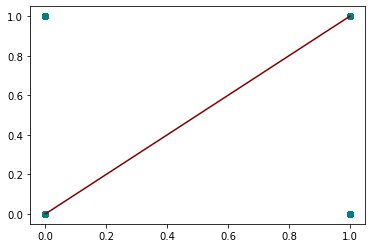

In [57]:
plt.scatter(test_preds, y_test, color="teal")
plt.plot(test_preds, test_preds, color="maroon")